# Lab 2 - Classify Pichu & Pikachu

## Read files
- pichu.txt
- pikachu.txt
- test_points.txt

In [171]:
import numpy as np

pichu_path = "files_lab2/pichu.txt"
pikachu_path = "files_lab2/pikachu.txt"
test_points_path = "files_lab2/test_points.txt"

# read files as [[x, y], [x, y],...,[x, y]]
with open(pichu_path, "r") as f_pichu, open(pikachu_path, "r") as f_pikachu, open(test_points_path, "r") as f_test_points:
    pichu = np.array([points.strip("(").strip(")").split(", ") for points in (value.strip("\n") for value in f_pichu.readlines())][1:], float)
    pikachu = np.array([points.strip("(").strip(")").split(", ") for points in (value.strip("\n") for value in f_pikachu.readlines())][1:], float)
    test_points = np.array([points.split(",") for points in (point.replace("(", "").replace(" ", "").replace(")", "") for point in f_test_points.readlines()[0].split("), "))], float)

## Plot pichu, pikachu and test points

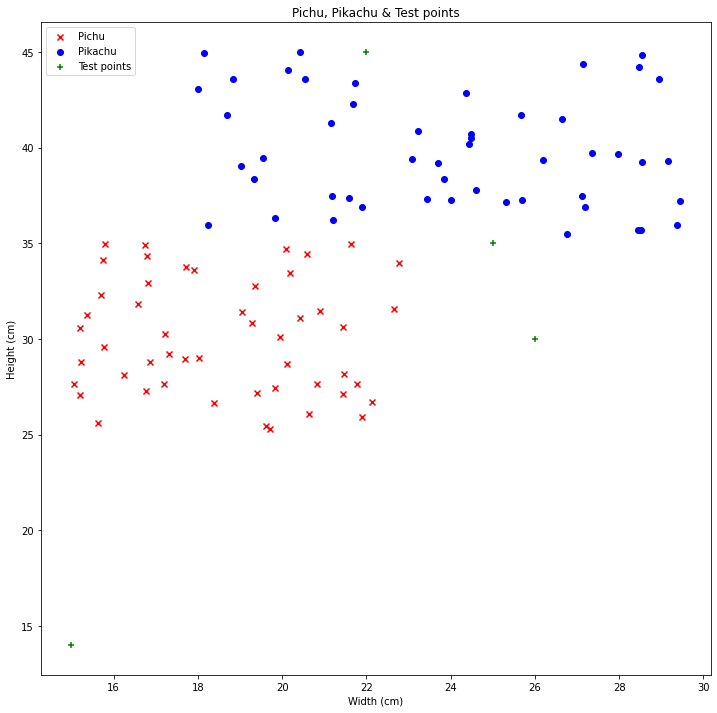

In [172]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.scatter(pichu[:, 0], pichu[:, 1], color = "red", label = "Pichu", marker = "x")
plt.scatter(pikachu[:, 0], pikachu[:, 1], color = "blue", label = "Pikachu")
plt.scatter(test_points[:, 0], test_points[:, 1], color = "green", label = "Test points", marker = "+")

plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.title("Pichu, Pikachu & Test points")
plt.legend()
plt.show()


## Calculate distance between test points and the rest of the data

In [181]:
import math 

# returns the euclidean distance between two points
def euclidean_distance(points_p, points_q) -> float:
    return math.sqrt((points_q[0] - points_p[0]) ** 2 + (points_q[1] - points_p[1]) ** 2)

# returns the shortest distance between a point and a set of points
def closest_distance(test_point, data_points) -> float:
    return min([euclidean_distance(test_point, data_point) for data_point in data_points])

# classifies if a point is either pikachu or pichu
def classify(test_point, pichu_points, pikachu_points) -> str:
    if closest_distance(test_point, pichu_points) > closest_distance(test_point, pikachu_points):
        return "Pikachu"
    else:
        return "Pichu"

# loops through all test points
for point in test_points:
        print(f"Test point ({int(point[0])}, {int(point[1])}) classified as {classify(point, pichu, pikachu)}")

Test point (25, 35) classified as Pikachu
Test point (15, 14) classified as Pichu
Test point (26, 30) classified as Pichu
Test point (22, 45) classified as Pikachu


## User input data

In [178]:
import re

# will ask the user for an input until its in the correct format
while(True):
    try:
        user_input = input("Test: ")
        if not bool(re.match("\d{2},\d{2}$", user_input)):     # this will check for negative numbers as well since it wont accept any sign "-" before the number
            raise TypeError("Please enter two positive numbers as a point like this: 12,34")
        user_input = [float(value) for value in user_input.split(",")]
        break
    except TypeError as err:
        print(err)
    
print(f"Test point ({int(user_input[0])}, {int(user_input[1])}) classified as {classify(user_input, pichu, pikachu)}")

Test point (12, 12) classified as Pichu


## 5 closest points classification

In [193]:
def five_closest(test_point, pichu_data, pikachu_data):
    # adds all points with corresponding label (Pichu or Pikachu)
    distance = []
    for point in pichu_data:
        distance.append([euclidean_distance(test_point, point), "Pichu"])
    for point in pikachu_data:
        distance.append([euclidean_distance(test_point, point), "Pikachu"])

    # sorts by distance and returns the 5 lowest
    # found this https://stackoverflow.com/questions/20183069/how-to-sort-multidimensional-array-by-column for how to sort a 2D array on first column
    return sorted(distance, key = lambda x : x[0])[:5]

# returns pikachu or pichu as to which has the majority
def classify_by_closest_five(closest_five) -> str:
    pikachu_count = 0
    for distance in closest_five:
        if distance[1] == "Pikachu":
            pikachu_count += 1
    if pikachu_count > 2:
        return "Pikachu"
    else:
        return "Pichu"

# loops through all test points 
for point in test_points:
    print(f"Test point ({int(point[0])}, {int(point[1])}) classified as {classify_by_closest_five(five_closest(point, pichu, pikachu))}")

Test point (25, 35) classified as Pikachu
Test point (15, 14) classified as Pichu
Test point (26, 30) classified as Pichu
Test point (22, 45) classified as Pikachu


# Bonus assignments
- Split the data into 90 training data (45 Pikachu, 45 Pichu) and 10 test data (5 Pikachu, 5 Pichu)
- Calculate accuracy with formula: accuracy = (Pichu predicted correct + Pikachu predicted correct) / total

In [195]:
import random as rnd

rnd.seed(123)    # seed = 123 so the result will be replicable
random_traning_data_index = rnd.sample(range(50), 45)   # 45 random numbers between 0 and 49
random_test_data_index = [i for i in range(50) if i not in random_traning_data_index]   # missing numbers from "random_traning_data_index" between 0 and 49

# picking training data and test data for Pichu and Pikachu
training_data_pichu = [pichu[i] for i in random_traning_data_index]
test_data_pichu = [pichu[i] for i in random_test_data_index]
training_data_pikachu = [pikachu[i] for i in random_traning_data_index]
test_data_pikachu = [pikachu[i] for i in random_test_data_index]

# returns how many times the prediction was correct
def test_prediction(test_points, predicted: str) -> int:
    predicted_correct = 0
    for test_point in test_points:
        if classify_by_closest_five(five_closest(test_point, training_data_pichu, training_data_pikachu)) == predicted:
            predicted_correct += 1
    return predicted_correct

pichu_predicted_correct = test_prediction(test_data_pichu, "Pichu")
pikachu_predicted_correct = test_prediction(test_data_pikachu, "Pikachu")
total = len(test_data_pichu + test_data_pikachu)

print(f"Accuracy: {int(((pichu_predicted_correct + pikachu_predicted_correct) / total) * 100)}%")

Accuracy: 100%
